In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([[165,137,472,192],[101,92,250,144],[29,127,201,91]],columns=['R&D','Ops','Marketing','Revenue'])

In [3]:
df.head()

,R&D,Ops,Marketing,Revenue
0,165,137,472,192
1,101,92,250,144
2,29,127,201,91


In [4]:
df['f0x'] = df['Revenue'].mean()

In [5]:
df

,R&D,Ops,Marketing,Revenue,f0x
0,165,137,472,192,142.333333
1,101,92,250,144,142.333333
2,29,127,201,91,142.333333


In [6]:
df.round(2)

,R&D,Ops,Marketing,Revenue,f0x
0,165,137,472,192,142.33
1,101,92,250,144,142.33
2,29,127,201,91,142.33


In [7]:
df['r1'] = df['f0x']-df['Revenue']
# r1 = actual -predicted value
df

,R&D,Ops,Marketing,Revenue,f0x,r1
0,165,137,472,192,142.333333,-49.666667
1,101,92,250,144,142.333333,-1.666667
2,29,127,201,91,142.333333,51.333333


In [8]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
# here even if we dont give max_depth it takes only 3 beccause we have only 3rows
reg.fit(df.iloc[:,0:3].values,df.iloc[:,-1])

DecisionTreeRegressor(max_depth=3)

[Text(0.4, 0.8333333333333334, 'X[2] <= 225.5\nsquared_error = 1701.556\nsamples = 3\nvalue = 0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 51.333'),
 Text(0.6, 0.5, 'X[2] <= 361.0\nsquared_error = 576.0\nsamples = 2\nvalue = -25.667'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -1.667'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -49.667')]

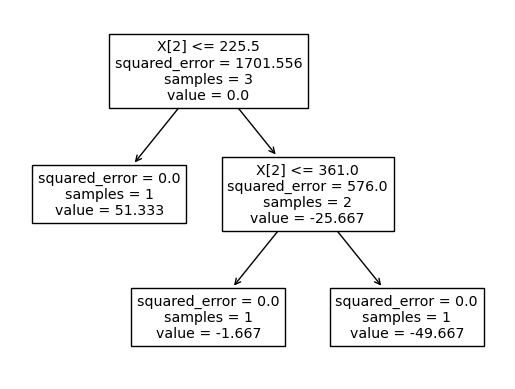

In [9]:
from sklearn.tree import plot_tree
plot_tree(reg)

##  step by step Gradient boosting

In [10]:
np.random.seed(42)
x = np.random.rand(100,1)-0.5

y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)

In [11]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [12]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [17]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

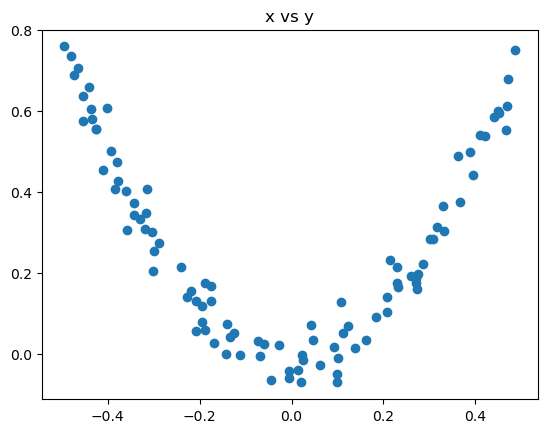

In [21]:
plt.scatter(df['x'],df['y'])
plt.title('x vs y')

In [22]:
df['pred1'] = df['y'].mean()
# pred1 = f0x ( it is a constant)

In [23]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [24]:
df['res1'] = df['y']-df['pred1']
# res1 = psuedo  residual

In [25]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Text(0.5, 1.0, 'x vs y')

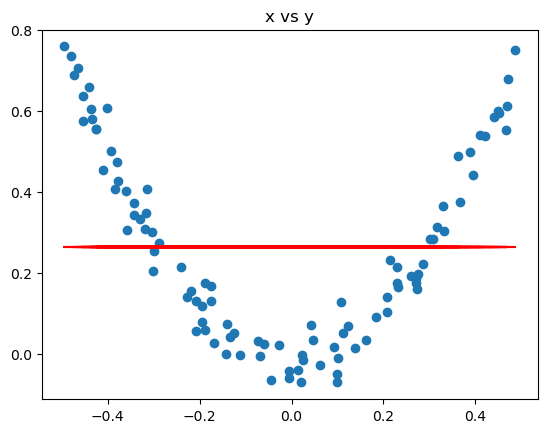

In [27]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color = 'red')
plt.title('x vs y')

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

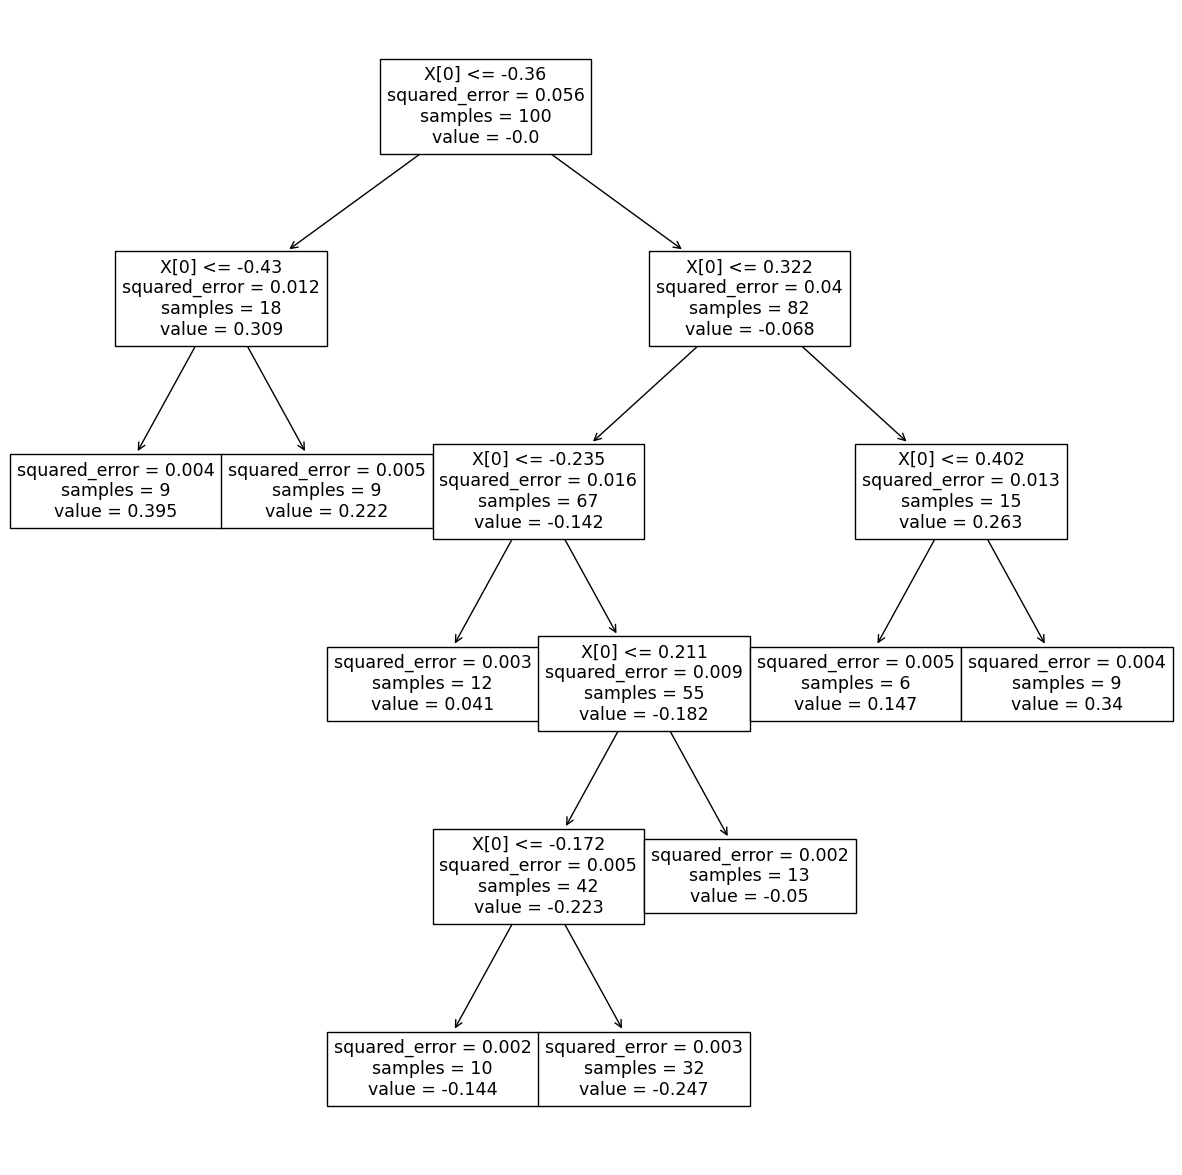

In [29]:
plt.figure(figsize=(15,15))
plot_tree(tree1)
plt.show()

In [30]:
# Generating x_test

x_test = np.linspace(-0.5,0.5,500)

In [32]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500,1))

# y_pred = constant + new decision tree value

Text(0.5, 1.0, 'x vs y')

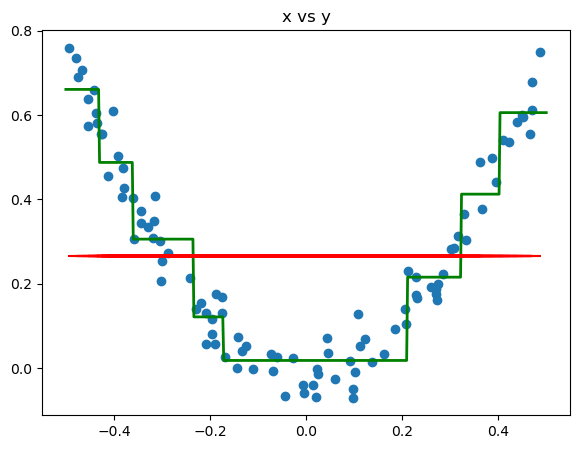

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color = 'green')
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color = 'red')
plt.title('x vs y')

In [36]:
# In the above fig 
# f(x) = f0(x) +f1(x)+f2(x)+...
# blue dots are acutal(x) vs actual(y) 
# red line is  constant f0(x) - very bad model
# green line is decision tree1 f1(x) - ok but still not that much good


In [37]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [38]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))
# pred2 = pred1+DT1(f0(x)+f1(x))

In [39]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [40]:
df['res2'] = df['y'] - df['pred2']

In [41]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [42]:
from sklearn.tree import DecisionTreeRegressor
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['x'].values.reshape(100,1),df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

In [43]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'x vs y')

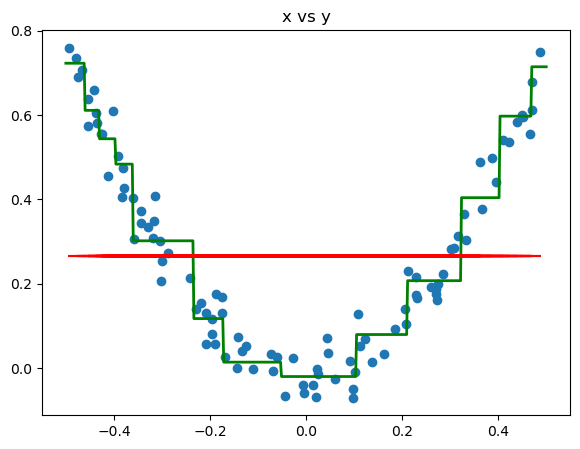

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth=2,color = 'green')
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color = 'red')
plt.title('x vs y')

In [45]:
# In the above fig 
# f(x) = f0(x) +f1(x)+f2(x)+...
# blue dots are acutal(x) vs actual(y) 
# red line is  constant f0(x) - very bad model
# green line is decision tree2 f1(x) - good,becuase this has contact all bottom points too

In [52]:
def gradient_boost(x, y, number, lr, count=1, regs=[], foo=None):
    if number ==0:
        return
    else:
        if count >1:
            y = y - regs[-1].predict(x)
        else:
            foo = y
            
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(x,y)
        regs.append(tree_reg)
        
        
        x1 = np.linspace(-0.5,0.5,500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1,1)) for regressor in regs)
        
        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(x[:, 0], foo, 'r.')
        plt.show()
        
        gradient_boost(x, y, number -1, lr, count+1, regs, foo=foo)
        

5


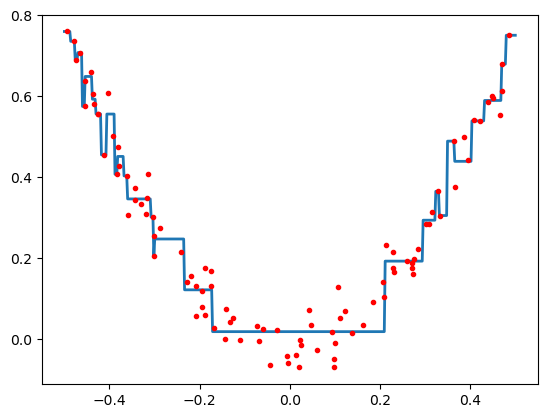

4


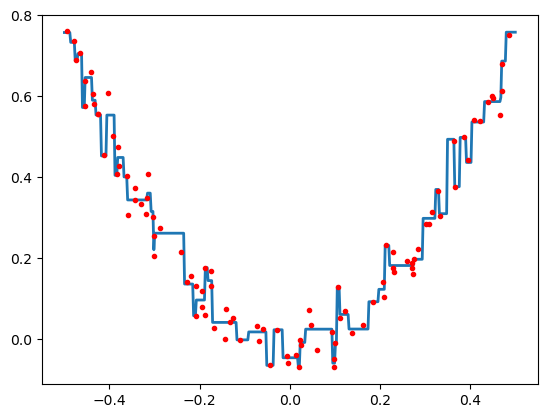

3


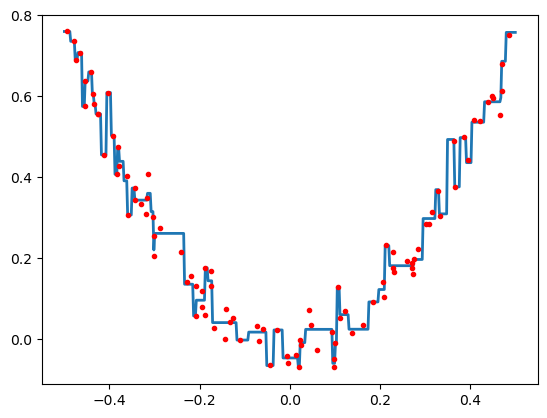

2


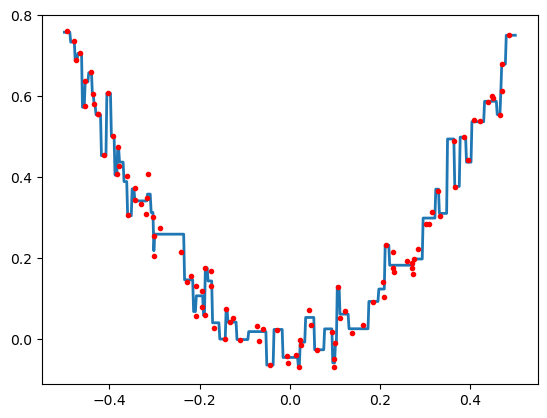

1


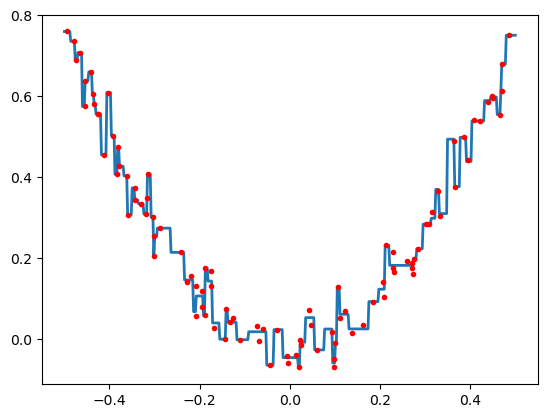

In [53]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)
gradient_boost(x, y, 5, lr=1)